VGG 16 was proposed by Karen Simonyan and Andrew Zisserman of the Visual Geometry Lab of Oxford University in  2014 in the paper "VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE -SCALE IMAGE RECOGNITION"

In [2]:
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions

In [5]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
from PIL import Image as PImage

In [9]:
img_width, img_height = 224, 224

In [10]:
model_pretrained = VGG16(weights = 'imagenet',
                         include_top = True, 
                         input_shape = (img_height, img_width, 3))

553476096/553467096 [==============================] - 4s 0us/step


In [18]:
img_path = '/content/drive/MyDrive/Computer Vision/lemon.jpg'

img = image.load_img( img_path, target_size = (img_width, img_height) )
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis =0)
img_data = preprocess_input(img_data)

In [19]:
cnn_feature = model_pretrained.predict(img_data, verbose = 0)
label = decode_predictions(cnn_feature)
label = label[0][0]

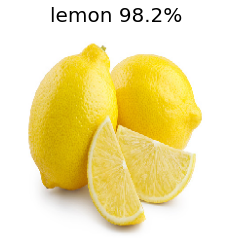

In [20]:
plt.imshow(img)
stringprint = "%.1f" % round(label[2]*100, 1)
plt.title(label[1] + " " + str(stringprint) + "%", fontsize = 20)
plt.axis('off')
plt.show()

In [22]:
# Insert correct path of your image foler below
folder_path = '/content/drive/MyDrive/Computer Vision/'
images = os.listdir(folder_path)
images

['lemon.jpg', 'daises.jpeg', 'human.jpg', 'elephant.jpeg', 'element2.jpeg']

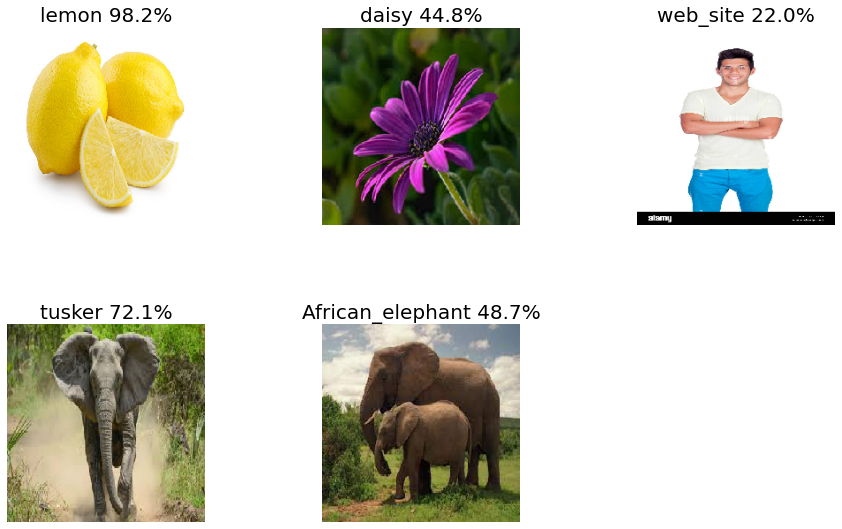

In [24]:
fig = plt.figure(figsize = (16, 20))

i = 0
rows = 4
columns = 3

for image1 in images:
  i+=1
  img = image.load_img(folder_path +image1, target_size = (img_width, img_height))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis = 0)
  img_data = preprocess_input(img_data)


  cnn_feature = model_pretrained.predict(img_data, verbose = 0)
  label = decode_predictions(cnn_feature)
  label = label[0][0]

  fig.add_subplot(rows, columns, i)
  fig.subplots_adjust(hspace = .5)

  plt.imshow(img)
  stringprint = "%.1f" % round(label[2]*100, 1)
  plt.title(label[1] + " " + str(stringprint) + "%", fontsize = 20 )
  plt.axis('off')

plt.show()